# Part 4: Plot your results

First things first – make sure to load the climate `DataFrame` you
stored in the previous notebooks using Jupyter cell magic:

In [15]:
# Load all stored variables
%store -r
climate_df

,PRCP_in,TOBS_far,TOBS_cel,PRCP_mm
DATE,,,,
1893-10-01,0.94,NaN,NaN,23.876
1893-10-02,0.00,NaN,NaN,0.000
1893-10-03,0.00,NaN,NaN,0.000
1893-10-04,0.04,NaN,NaN,1.016
1893-10-05,0.00,NaN,NaN,0.000
...,...,...,...,...
2023-09-26,0.00,74.0,23.333333,0.000
2023-09-27,0.00,69.0,20.555556,0.000
2023-09-28,0.00,73.0,22.777778,0.000


In [16]:
climate_df.dtypes

PRCP_in     float64
TOBS_far    float64
TOBS_cel    float64
PRCP_mm     float64
dtype: object

You’ll also need some libraries later on. This is an extension to
`pandas` that will allow you to easily make beautiful, interactive
plots, and a related library that will let you save your plots:

In [18]:
import holoviews as hv
import hvplot.pandas

## Plot the precpitation column (PRCP) vs time to explore the data

Plotting in Python is easy, but not quite this easy:

<Axes: xlabel='DATE'>

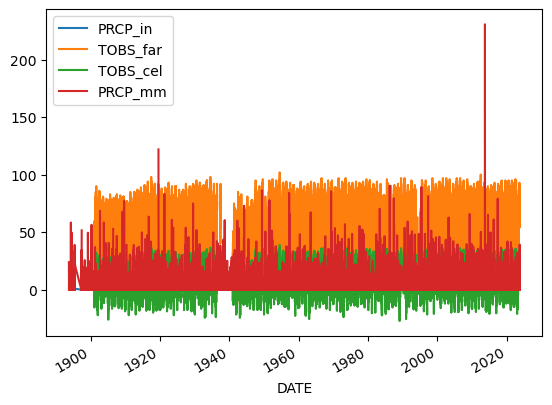

In [19]:
climate_df.plot()

Looks like we have *both* precipitation and temperature on the same
plot, and it’s hard to see what it is because it’s missing labels!

> ****Label your plot****
>
> <figure>
> <img src="https://imgs.xkcd.com/comics/convincing.png"
> alt="Source: https://xkcd.com/833" />
> <figcaption aria-hidden="true">Source: https://xkcd.com/833</figcaption>
> </figure>
>
> Make sure each plot has:
>
> -   A title that explains where and when the data are from
> -   x- and y- axis labels with **units** where appropriate
> -   A legend where appropriate

When plotting in Python, you’ll always need to add some instructions on
labels and how you want your plot to look.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot your data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Change <code>dataframe</code> to <strong>your</strong>
<code>DataFrame</code> name.</li>
<li>Change <code>y=</code> to the name of your <strong>observed
temperature</strong> column name.</li>
<li>Use the <code>title</code>, <code>ylabel</code>, and
<code>xlabel</code> parameters to add key text to your plot.</li>
<li>Adjust the size of your figure using <code>figsize=(x,y)</code>
where <code>x</code> is figure width and <code>y</code> is figure
height</li>
</ol>
<blockquote>
<p><strong>HINT:</strong> labels have to be a <em>type</em> in Python
called a <strong>string</strong>. You can make a string by putting
quotes around your label, just like the column names in the sample code
(eg <code>y='TOBS'</code>).</p>
</blockquote></div></div>

<Axes: title={'center': 'Precipitation over Time'}, xlabel='Date', ylabel='Precipitation (mm)'>

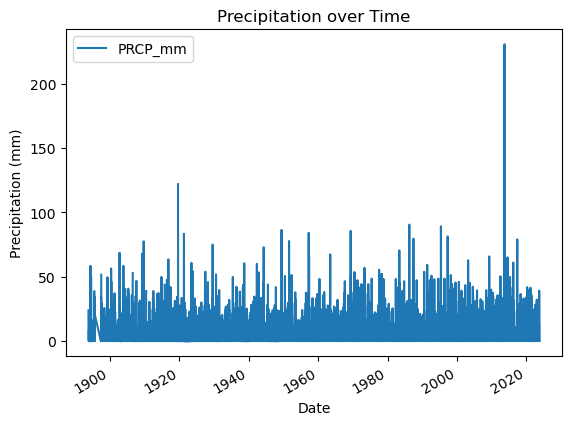

In [20]:
# Plot the data using .plot
climate_df.plot(
    y='PRCP_mm',
    title='Precipitation over Time',
    xlabel='Date',
    ylabel='Precipitation (mm)')

<Axes: title={'center': 'Temperature over Time'}, xlabel='Date', ylabel='Temperature (celcius)'>

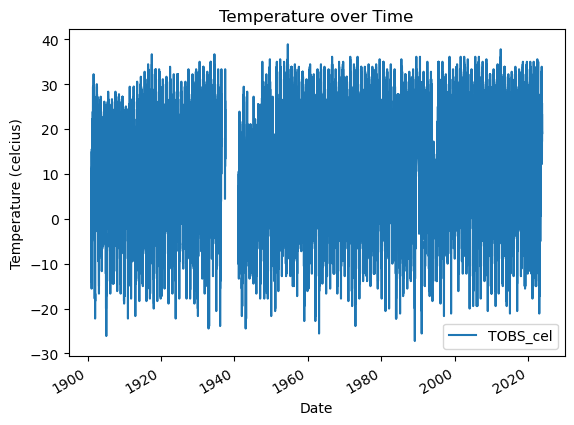

In [21]:
# Plot the data using .plot
climate_df.plot(
    y='TOBS_cel',
    title='Temperature over Time',
    xlabel='Date',
    ylabel='Temperature (celcius)')

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>There are many other things you can do to customize your plot. Take a
look at the <a
href="https://pandas.pydata.org/docs/user_guide/visualization.html">pandas
plotting galleries</a> and the <a
href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">documentation
of plot</a> to see if there’s other changes you want to make to your
plot. Some possibilities include:</p>
<ul>
<li>Remove the legend since there’s only one data series</li>
<li>Increase the figure size</li>
<li>Increase the font size</li>
<li>Change the colors</li>
<li>Use a bar graph instead (usually we use lines for time series, but
since this is annual it could go either way)</li>
<li>Add a trend line</li>
</ul>
<p>Not sure how to do any of these? Try searching the internet, or
asking an AI!</p></div></div>

## Clean up time series plots by resampling

You may notice that your plot looks a little “fuzzy”. This happens when
Python is trying to plot a value for every date, but the resolution of
the image is too low to actually do that. You can address this issue by
**resampling** the data, or summarizing it over a time period of your
choice. In this case, we will resample annually, giving us one data
point per year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Resample</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Set the frequency of your final data by replacing
<code>DT_OFFSET</code>with a <strong>Datetime Offset Code</strong>.
Check out the table in the <a
href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects">pandas
datetime documentation</a> to find the one you want (we recommend the
start of the year).</li>
<li>Choose how to summarize each year of data by replacing
<code>agg_method_here</code> with a method that will calculate the
<strong>average annual value</strong>. Check out the <a
href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#basics">pandas
resampling documentation</a> for a list of common built-in options.</li>
</ol></div></div>

In [22]:
ann_climate_df = climate_df.resample('YS').mean()
ann_climate_df

,PRCP_in,TOBS_far,TOBS_cel,PRCP_mm
DATE,,,,
1893-01-01,0.025543,NaN,NaN,0.648804
1894-01-01,0.058841,NaN,NaN,1.494573
1895-01-01,0.117090,NaN,NaN,2.974075
1896-01-01,NaN,NaN,NaN,NaN
1897-01-01,0.068922,NaN,NaN,1.750629
...,...,...,...,...
2019-01-01,0.057644,54.426997,12.459443,1.464153
2020-01-01,0.046721,57.691460,14.273033,1.186721
2021-01-01,0.056658,57.538462,14.188034,1.439101


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot Annual Data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Try plotting your new DataFrame in the cell below. Can you see what
is going on more clearly now? Don’t forget to adjust your labels!</li>
</ol></div></div>

<Axes: title={'center': 'Precipitation over Time'}, xlabel='Date', ylabel='Precipitation (mm)'>

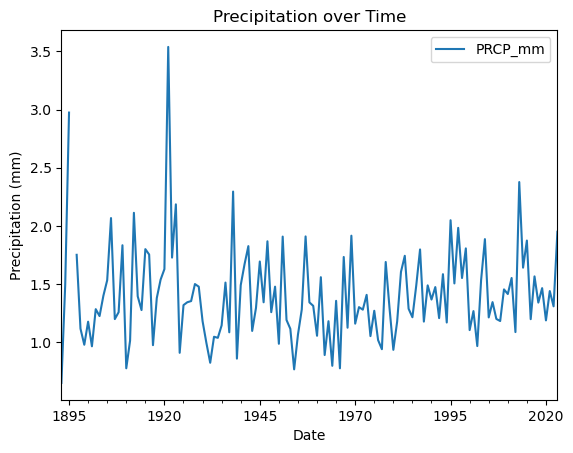

In [24]:
# Plot the annual data
ann_climate_df.plot(
    y='PRCP_mm',
    title='Precipitation over Time',
    xlabel='Date',
    ylabel='Precipitation (mm)')

<Axes: title={'center': 'Temperature over Time'}, xlabel='Date', ylabel='Temperature (celcius)'>

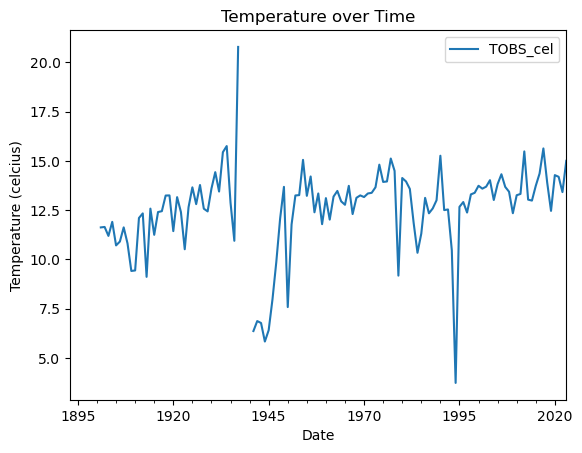

In [26]:
# Annual Temperature
ann_climate_df.plot(
    y='TOBS_cel',
    title='Temperature over Time',
    xlabel='Date',
    ylabel='Temperature (celcius)')

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond: Interpret your plot</div></div><div class="callout-body-container callout-body"><ol type="1">
<li><p>Create a new Markdown cell below this one.</p></li>
<li><p>In the new cell, answer the following questions using a
<strong>bulleted list</strong> in Markdown – what are 2 things you
notice about this data? What physical phenomena or data anomaly could be
causing each one?</p></li>
</ol>
<div data-__quarto_custom="true"
data-__quarto_custom_type="ConditionalBlock"
data-__quarto_custom_context="Block" data-__quarto_custom_id="6">
<div data-__quarto_custom_scaffold="true">
<div>

</div>
</div>
</div></div></div>

## Check specific values with an interactive plot

You can use the `.hvplot()` method with similar arguments to create an
interactive plot.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Interactive Plot</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Copy your plotting code into the cell below.</li>
<li>Replace <code>.plot</code> in your code with
<code>.hvplot</code></li>
</ol>
<p>Now, you should be able to hover over data points and see their
values!</p></div></div>

In [25]:
# Plot the annual data interactively
ann_climate_df.hvplot(
    y='PRCP_mm',
    title='Precipitation over Time',
    xlabel='Date',
    ylabel='Precipitation (mm)')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (PRCP_mm)

In [27]:
# Annual Temperature Interactive
ann_climate_df.hvplot(
    y='TOBS_cel',
    title='Temperature over Time',
    xlabel='Date',
    ylabel='Temperature (celcius)')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (TOBS_cel)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Explore the data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li><p>Create a new Markdown cell below this one.</p></li>
<li><p>Hover over the lowest point on your plot. What is the overall
minimum annual average temperature?</p></li>
</ol></div></div>

## BONUS: Save your work

You will need to save your analyses and plots to tell others about what
you find.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Save Your Plot</div></div><div class="callout-body-container callout-body"><p>Just like with any other type of object in Python, if you want to
reuse your work, you need to give it a name.</p>
<ol type="1">
<li>Go back to your <code>hvplot</code> code, and give your plot a name
by assigning it to a variable. HINT: if you still want your plot to
display in your notebook, make sure to <strong>call</strong> its name at
the end of the cell.</li>
<li>Replace <code>my_plot</code> with the name you gave to your
plot.</li>
<li>Replace <code>'my_plot.html'</code> with the name you want for your
plot. If you change the file extension, <code>.html</code>, to
<code>.png</code>, you will get an image instead of an interactive
webpage, provided you have the necessary libraries installed.</li>
</ol>
<p>Once you run the code, you should see your saved plot in your files –
go ahead and open it up.</p>
<div data-__quarto_custom="true" data-__quarto_custom_type="Callout"
data-__quarto_custom_context="Block" data-__quarto_custom_id="8">
<div data-__quarto_custom_scaffold="true">

</div>
<div data-__quarto_custom_scaffold="true">
<p>You may need to right-click on your file and download it to be able
to view it.</p>
</div>
</div></div></div>

In [28]:
prec_plot = ann_climate_df.hvplot(
    y='PRCP_mm',
    title='Precipitation over Time',
    xlabel='Date',
    ylabel='Precipitation (mm)')
hv.save(prec_plot, 'prec_plot.html')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


In [29]:
%store ann_climate_df

Stored 'ann_climate_df' (DataFrame)
